# EmoDetect

## Jasmeet Singh 

## SID: 200405262

### Loading the Libraries 

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2023-11-02 14:16:21.173824: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Running the dataset and reading the images 

In [2]:
img_array = cv2.imread("/Users/jasmeetsingh/Desktop/ENSE480 Project/Training/0/PrivateTest_731447.jpg")

In [3]:
img_array.shape

(48, 48, 3)

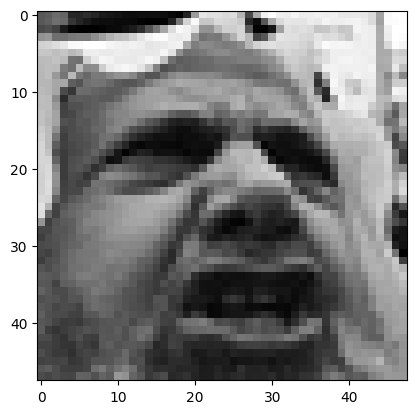

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "/Users/jasmeetsingh/Desktop/ENSE480 Project/Training/"

In [6]:
Classes = ["0", "1", "2","3","4","5","6"]

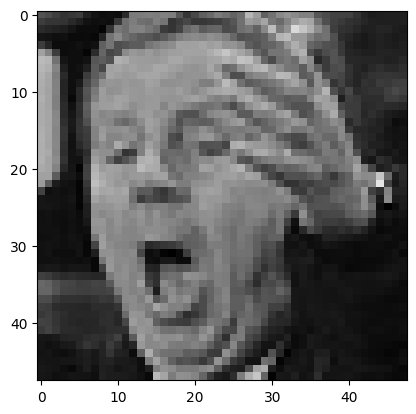

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break 
    break

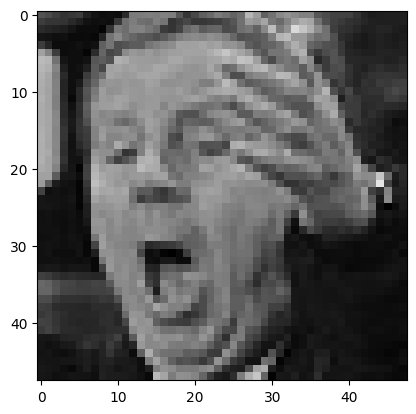

In [8]:
img_size= 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
# reading all the images and converting them to array
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
                

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

7178


In [13]:
temp = np.array(training_Data)

/var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/ipykernel_3786/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [14]:
temp.shape

(7178, 2)

In [15]:
#Shuffling for dynamic readings
import random

random.shuffle(training_Data)

In [16]:
# data/feature
x = []
#label
y=[]

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
## here we are converting it to 4 dimensions 
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [17]:
x.shape

(7178, 224, 224, 3)

In [18]:
#normalizing the data. Important before training
x=x/255.0

In [19]:
y[0]

5

In [20]:
Y = np.array(y)

In [21]:
Y.shape

(7178,)

### Creating the model 

In [22]:
## Deep learning model for training - Transfer Learning 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
## Pre-trained Model
model = tf.keras.applications.MobileNetV2()

2023-04-11 14:18:41.317632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [25]:
# Transfer Learning - Tuning, weights will start from the last check point
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
#adding new layer, after the output of global pooling layer 
final_output = layers.Dense(128)(base_output)

## activation function
final_output = layers.Activation('relu')(final_output)

final_output = layers.Dense(64)(base_output)
final_output = layers.Activation('relu')(final_output)
# 7 inputs
final_output = layers.Dense(7, activation = 'softmax')(final_output) # classification layer

In [29]:
## output
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
#creating a model
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training the Model 

In [34]:
#training the model
new_model.fit(x,Y, epochs = 50)

Epoch 1/50
225/225 [==============================] - 576s 3s/step - loss: 1.4061 - accuracy: 0.4635
Epoch 2/50
225/225 [==============================] - 546s 2s/step - loss: 1.1623 - accuracy: 0.5596
Epoch 3/50
225/225 [==============================] - 564s 3s/step - loss: 1.0728 - accuracy: 0.5922
Epoch 4/50
225/225 [==============================] - 546s 2s/step - loss: 0.9725 - accuracy: 0.6326
Epoch 5/50
225/225 [==============================] - 539s 2s/step - loss: 0.9106 - accuracy: 0.6588
Epoch 6/50
225/225 [==============================] - 538s 2s/step - loss: 0.8301 - accuracy: 0.6913
Epoch 7/50
225/225 [==============================] - 536s 2s/step - loss: 0.7745 - accuracy: 0.7126
Epoch 8/50
225/225 [==============================] - 535s 2s/step - loss: 0.7050 - accuracy: 0.7432
Epoch 9/50
225/225 [==============================] - 534s 2s/step - loss: 0.6496 - accuracy: 0.7621
Epoch 10/50
225/225 [==============================] - 536s 2s/step - loss: 0.5602 - accura

### Saving and loading the model 

In [35]:
## saving the model 
new_model.save('Final_model_07.h5')

In [36]:
## Loading the model 
new_model = tf.keras.models.load_model('Final_model_07.h5')

In [1]:
new_model.evaluate ## for accuracy purposes, deploy live image demo

NameError: name 'new_model' is not defined

### Testing after training the model 

In [37]:
## to test the image:
frame = cv2.imread("/Users/jasmeetsingh/Desktop/ENSE480 Project/sad.jpg")

In [38]:
frame.shape

(479, 359, 3)

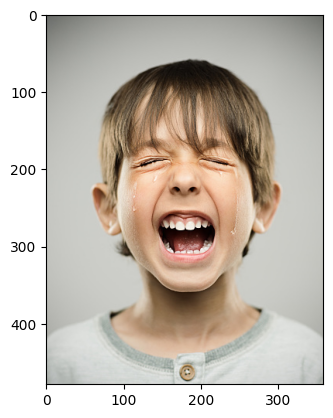

In [39]:
## Displaying the test image
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
#Now we need face detetction through XML file, Face detection algorithm 
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(479, 359)

### Setting the dimensions of the face

In [43]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2) 
    multiplefaces = faceCascade.detectMultiScale(roi_gray)
    if len(multiplefaces) == 0:
        print ("Sorry the face is not detetcted, TRY AGAIN")
    else:
        for (ex,ey,ew,eh) in multiplefaces:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

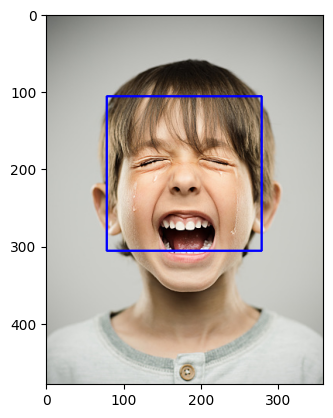

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

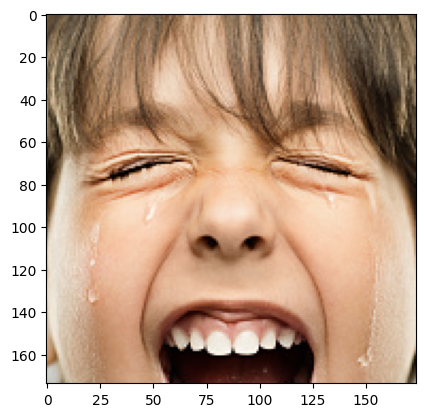

In [45]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [46]:
## resizing the image for better accuracy
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [47]:
Predictions =new_model.predict(final_image)

1/1 [==============================] - 1s 999ms/step


In [48]:
Predictions[0]

array([3.3637320e-03, 6.4974907e-11, 4.0446382e-02, 6.0427269e-10,
       9.5618325e-01, 6.6405942e-06, 2.4168311e-12], dtype=float32)

In [49]:
np.argmax(Predictions)

4

## At this point the deep learning architecture has been trained well for demo. 
## Now Realtime Video Demo

### Demo with Deepface

2023-11-24 14:48:56.170239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.01it/s]


Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]


Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.23it/s]


Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.13it/s]


Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.94it/s]


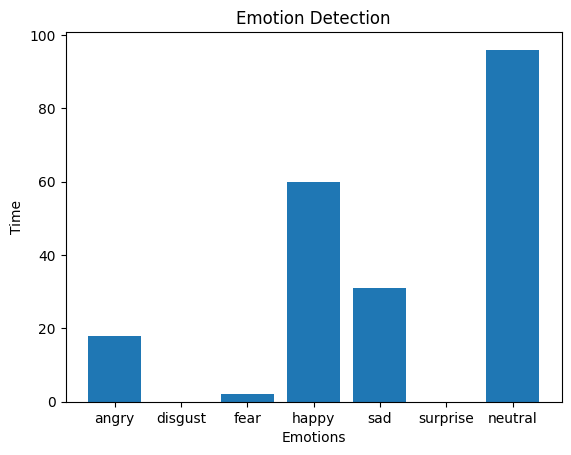

In [1]:
## Trying using the graph

import cv2
import numpy as np
from deepface import DeepFace
import matplotlib.pyplot as plt

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    pass

cv2.namedWindow('Emotion Detector', cv2.WINDOW_NORMAL)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize emotion counter
emotion_counter = {
    "angry": 0,
    "disgust": 0,
    "fear": 0,
    "happy": 0,
    "sad": 0,
    "surprise": 0,
    "neutral": 0
}

def plot_emotion_counter():
    plt.bar(emotion_counter.keys(), emotion_counter.values())
    plt.title("Emotion Detection")
    plt.xlabel("Emotions")
    plt.ylabel("Time")
    plt.show()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        face_roi = roi_color
        face_roi_resized = cv2.resize(face_roi, (48, 48))
        result = DeepFace.analyze(face_roi_resized, actions=['emotion'], enforce_detection=False)

        # Access the dictionary containing the emotion analysis
        emotion_analysis = result[0]
        status = emotion_analysis['dominant_emotion']

        # Update emotion counter
        emotion_counter[status] += 1

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (x + int(w / 2) - 20, y - 10), font, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Detector', frame)
    cv2.resizeWindow('Emotion Detector', 640, 480)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Plot the emotion counter
plot_emotion_counter()


### Demo with Tensorflow

In [ ]:
## Now trying graph using tensorflow

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

# Load your trained model
new_model = tf.keras.models.load_model('Final_model_07.h5')

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Now adding the camera
cap = cv2.VideoCapture(0)

# Check if the camera is opened correctly
if not cap.isOpened():
    pass

cv2.namedWindow('Emotion Detector', cv2.WINDOW_NORMAL)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize emotion counter
emotion_counter = {
    "Angry": 0,
    "Disgust": 0,
    "Fear": 0,
    "Happy": 0,
    "Sad": 0,
    "Surprise": 0,
    "Neutral": 0
}

def plot_emotion_counter():
    plt.bar(emotion_counter.keys(), emotion_counter.values())
    plt.title("Emotion Detection")
    plt.xlabel("Emotions")
    plt.ylabel("Time")
    plt.show()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        face_roi = roi_color
        final_image = cv2.resize(face_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image / 255.0

        Predictions = new_model.predict(final_image)
        status = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"][np.argmax(Predictions)]

        # Update emotion counter
        emotion_counter[status] += 1

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, status, (x + int(w / 2) - 20, y - 10), font, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Detector', frame)
    cv2.resizeWindow('Emotion Detector', 640, 480)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Plot the emotion counter
plot_emotion_counter()


2023-10-31 22:51:14.259701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 22:51:20.683748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[ WARN:0@8.170] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


## Front-end Development using Flask

In [1]:
from flask import Flask, render_template
from tensorflow.keras.models import load_model

app = Flask(__name__)

@app.route("/")
def index():
    try:
        return render_template("index.html")
    except Exception as e:
        return f"An error occurred: {str(e)}"

if __name__ == "__main__":
    try:
        app.run(debug=True, host='localhost', port=5000)
    except Exception as e:
        print(f"An error occurred: {str(e)}")

2023-11-13 22:14:05.759596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://localhost:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 689, in initialize
    self.init_sockets()
  File "/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 328, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/jasmeets

SystemExit: 1

/Users/jasmeetsingh/opt/anaconda3/envs/human/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
